# TP4

Santiago Benites fc54392 \
Joao Ferreira fc55312

Aprendizagem Automática Avançada 22/23

In [192]:
import numpy as np
from hmmlearn import hmm
import pandas as pd
import matplotlib.pyplot as plt

Rolls = [6,6,4,1,5,3,2,1,6,1,6,2,1,1,5,2,3,4,6,5,3,2,1,4,3,5,6,6,3,4,2,6,1,6,5,5,2,3,4,2,3,2,3,1,5,1,4,2,4,6,4,1,5,6,6,6,3,2,4,6]
Dice = ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'F', 'F', 'F', 'F', 'F', 'F', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']

rolls = [[x] for x in Rolls]
gen_states = [0 if x == 'L' else 1 for x in Dice]

X_train = rolls[:10]
X_validate = rolls[10:]

Construct the model assuming all parameters known.

In [193]:
model = hmm.CategoricalHMM(n_components=2, random_state=99)

# Probabilities
model.startprob_ = np.array([1.0, 0.0])
model.transmat_ = np.array([[0.95, 0.05],[0.1, 0.9]])
model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])
                                 
# Model Fit
model.fit(X_train)

# Scoring
score = model.score(X_validate)
print(f'Score: {score}')

Score: -94.88892205175902


Train the model assuming the transition probability matrix is unknown. Compare the
estimated transition matrix with the original one. Visualize the generated dice series
against the given one

In [194]:
model = hmm.CategoricalHMM(n_components=2, random_state=99)

# Probabilities
model.startprob_ = np.array([1.0, 0.0])
model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])

# Model Fit
model.fit(X_train)

# Scoring
print(f'Matrix: {model.transmat_}')
states = model.predict(rolls)
print(f'Dice rolls: \n {states} \n Original: \n {np.array(gen_states)}')

Matrix: [[0.31125409 0.68874591]
 [0.23651163 0.76348837]]
Dice rolls: 
 [1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1] 
 Original: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


Train HMM’s with half of the data points and observe the log-likelihood with the remain-
ing half. Compare the estimated parameters (transition and emission matrices) with the
original model from question a). Visualize the generated dice series of the last half of data
against the given one.

In [195]:
rolls = [[int(line.strip())] for line in open("rolls.txt").readlines()]
Dice = [0 if line.strip() == 'L' else 1 for line in open("dice.txt").readlines()]

X_train = rolls[:len(rolls) // 2]
X_validate = rolls[len(rolls) // 2:]

Assume both transition and emission matrices are unknown.

In [196]:
model = hmm.CategoricalHMM(n_components=2, random_state=99)

# Probabilities
model.startprob_ = np.array([1.0, 0.0])
# Model Fit
model.fit(X_train)

# Scoring
score = model.score(X_validate)
print(f'Score: {score}')
print(f'Matrix: {model.transmat_}')
states = model.predict(X_validate)
match_percent = (len(set(states).intersection(set(states))))/len(Dice)*100
print(f'Percentage of overlap {match_percent}')

Score: -969.3279773553168
Matrix: [[0.50235211 0.49764789]
 [0.17430666 0.82569334]]
Percentage of overlap 0.18181818181818182


Assume all the parameters unknown, including the number of states

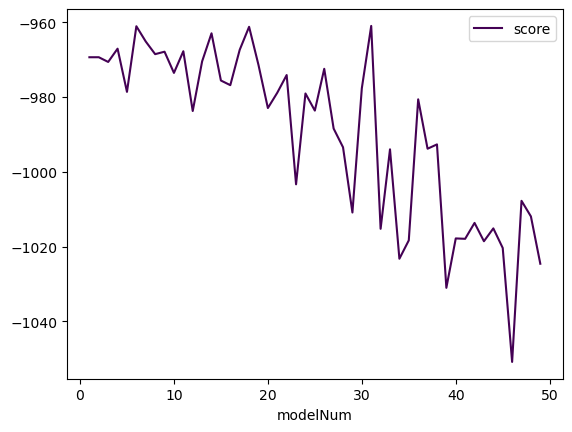

In [197]:
import logging
logging.basicConfig(level=logging.CRITICAL)

best_score = best_model = None
n_fits = 50
modelFrame = {"modelNum" : [], "score" : []}

for x in range(1,n_fits):

    model = hmm.CategoricalHMM(n_components=x, random_state=99)

    model.fit(X_train)

    score = model.score(X_validate)
    #print(f'Model #{x}\tScore: {score}')
    modelFrame['modelNum'].append(x)
    modelFrame['score'].append(score)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

data = pd.DataFrame(modelFrame)
data.plot(x='modelNum', y = 'score', colormap = 'viridis')
logging.basicConfig(level=logging.DEBUG)

Generate 30000 samples from the model of question a). Repeat question c) using this new dataset.

In [198]:
model = hmm.CategoricalHMM(n_components=2, random_state=99)

# Probabilities
model.startprob_ = np.array([1.0, 0.0])
model.transmat_ = np.array([[0.95, 0.05],[0.1, 0.9]])
model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])

rolls, gen_states = model.sample(30000)
X_train = rolls[:len(rolls) // 2]
X_validate = rolls[len(rolls) // 2:]

Assume both transition and emission matrices are unknown.

In [199]:
model = hmm.CategoricalHMM(n_components=2, random_state=99)

# Probabilities
model.startprob_ = np.array([1.0, 0.0])
# Model Fit
model.fit(X_train)

# Scoring
score = model.score(X_validate)
print(f'Score: {score}')
print(f'startprob_: {model.startprob_}')
print(f'transmat_: {model.transmat_}')
print(f'emissionprob_: {model.emissionprob_}')

Score: -26279.221642201657
startprob_: [0.88002932 0.11997068]
transmat_: [[0.80165285 0.19834715]
 [0.16448457 0.83551543]]
emissionprob_: [[0.17557624 0.20703438 0.15106413 0.19431317 0.16633607 0.10567601]
 [0.11329392 0.08915011 0.13814013 0.10019054 0.13047239 0.42875292]]


Assume all the parameters unknown, including the number of states

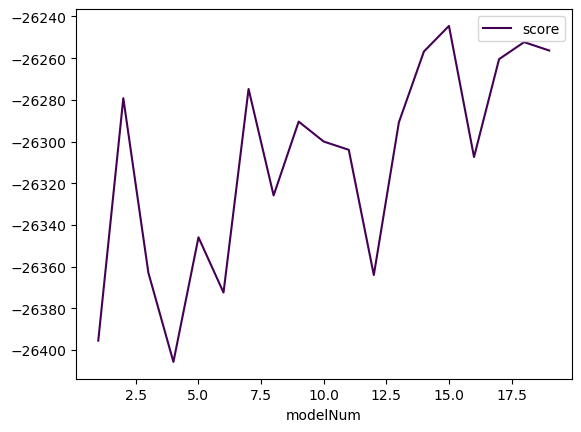

In [203]:
import logging
logging.basicConfig(level=logging.CRITICAL)

best_score = best_model = None
n_fits = 20
modelFrame = {"modelNum" : [], "score" : []}

for x in range(1,n_fits):

    model = hmm.CategoricalHMM(n_components=x, random_state=99)

    model.fit(X_train)

    score = model.score(X_validate)
    #print(f'Model #{x}\tScore: {score}')
    modelFrame['modelNum'].append(x)
    modelFrame['score'].append(score)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

data = pd.DataFrame(modelFrame)
data.plot(x='modelNum', y = 'score', colormap = 'viridis')
logging.basicConfig(level=logging.DEBUG)